In [3]:
# Imports
using StatsBase
using Plots
using Statistics

## Exercise 1: Modelling the spread of an infection or rumour

In [6]:
@enum InfectionStatus S I R

In [7]:
x = S

S::InfectionStatus = 0

In [8]:
typeof(x)

Enum InfectionStatus:
S = 0
I = 1
R = 2

In [9]:
Int64(x)

0

In [10]:
N=100
agents = [S for i in 1:N];

index = rand(1:N)
agents[index] = I

I::InfectionStatus = 1

In [11]:
# event with probability p
bernouli(p) = rand() < p
#bernouli(0.25)

bernouli (generic function with 1 method)

In [12]:
function step!(agents, p_I)
    N = length(agents)
    i = rand(1:N)
    if agents[i] == I  #if infected agent, then pick another agent and infect
        j = rand(1:N)
        while (j == i) # loop till i is not equal to j
            j = rand(1:N)
        end
        if (agents[j] == S) & (bernouli(p_I))
            agents[j] = I
        end
        return agents
    else
        return agents
    end
end

step! (generic function with 1 method)

In [13]:
# sweep is allowing one step for each of the N agents - though the agent moving (i) is random so need not be 
# sweep is one step of the simulation
function sweep!(agents, p_I) 
    for i in 1:length(agents)
        step!(agents, p_I)
    end
    return agents
end

sweep! (generic function with 1 method)

In [14]:
# create agent of N agents, run sweep T times and store the number of Infected agents in each loop
function infection_simulation(N, p_I, T)
    agents = [S for i in 1:N]
    agents[rand(1:N)] = I
    
    Is = [1]
    
    for i in 1:T
        sweep!(agents, p_I) 
        push!(Is, countmap(agents)[I])
    end
    return Is
    
end

infection_simulation (generic function with 1 method)

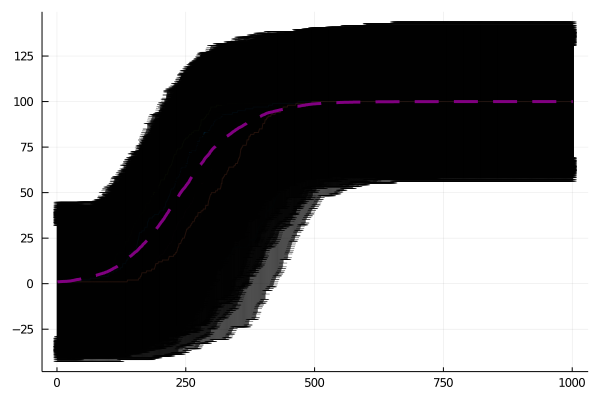

In [17]:
# Run the simulation num_simulations times
num_simulations = 50
N = 100
p_I = 0.02
T = 1000

p = plot(leg=false, fmt=:png)
results=[]
σ = []
for i in 1:num_simulations
    result_sim = infection_simulation(N, p_I, T)
    push!(results, result_sim)
    push!(σ, std(result_sim))
    
    plot!(result_sim, alpha=0.5, yerr=std(result_sim)) # can't change error bar transparency!
end

plot!(mean(results), lw=3, ls=:dash, c=:purple)

p



## Exercise 2: Agent type

In [12]:
mutable struct Agent
    status::InfectionStatus
    num_infected::Int
end

In [13]:
w = Agent(S, 0)

Agent(S, 0)

In [14]:
Int64(w.status)

0

In [15]:
Agent() = Agent(S, 0)

Agent

In [16]:
methods(Agent)

# 3 methods for type constructor:
[1] Agent() in Main at In[15]:1
[2] Agent(status::InfectionStatus, num_infected::Int64) in Main at In[12]:2
[3] Agent(status, num_infected) in Main at In[12]:2

In [17]:
function step!(agents::Vector{Agent}, p_I)
    N = length(agents)
    i = rand(1:N)
    if agents[i].status == I  #if infected agent, then pick another agent and infect
        j = rand(1:N)
        while (j == i) # loop till i is not equal to j
            j = rand(1:N)
        end
        if (agents[j].status == S) & (bernouli(p_I))
            agents[j].status = I
            agents[i].num_infected += 1
        end
        return agents
    else
        return agents
    end
end

step! (generic function with 2 methods)

In [18]:
# sweep is allowing one step for each of the N agents - though the agent moving (i) is random so need not be 
# sweep is one step of the simulation
function sweep!(agents::Vector{Agent}, p_I) 
    for i in 1:length(agents)
        step!(agents, p_I)
    end
    return agents
end

sweep! (generic function with 2 methods)

In [19]:
function counts_data(data)
    
    counts = Dict{Int, Int}()
    for item in data
        if haskey(counts, item)
            counts[item] += 1
        else
            counts[item] = 1
        end
    end
    ks = collect(keys(counts))
    vs = collect(values(counts))
    p = sortperm(ks)
    
    return ks[p], vs[p]
end

counts_data (generic function with 1 method)

In [20]:
function probability_distribution(data)
    ks, vs = counts_data(data)
    vs_norm = vs/sum(vs)
    return ks, vs_norm
end

probability_distribution (generic function with 1 method)

In [54]:
# create agent of N agents, run sweep T times and store the number of Infected agents in each loop
function num_infected_dist_simulation(N, p_I, T)
    agents = [Agent() for i in 1:N]
    agents[rand(1:N)] = Agent(I, 0)
    
    Is = [1]
    
    for i in 1:T
        sweep!(agents, p_I) 
        push!(Is, countmap([i.status for i in agents])[I])
    end
    
    return probability_distribution([i.num_infected for i in agents])
    
end

num_infected_dist_simulation (generic function with 1 method)

In [55]:
Ns, Ps = num_infected_dist_simulation(N, p_I, T)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0.479, 0.269, 0.133, 0.068, 0.024, 0.013, 0.008, 0.002, 0.001, 0.001, 0.002])

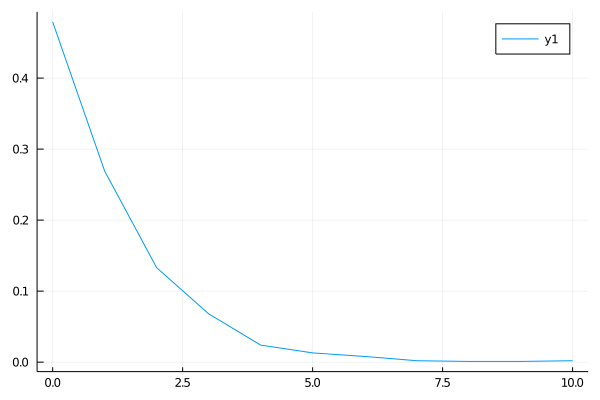

In [56]:
plot(Ns, Ps, fmt=:png)

In [57]:
# Run the simulation num_simulations times - How to average and plot?
num_simulations = 50
N = 100
p_I = 0.02
T = 1000

results=[]
for i in 1:num_simulations
    result_sim = num_infected_dist_simulation(N, p_I, T)
    push!(results, result_sim)
end


## Exercise 3: Epidemic model

In [58]:
function step!(agents::Vector{Agent}, p_I, p_R)
    N = length(agents)
    i = rand(1:N)
    if agents[i].status == I  #if infected agent, then pick another agent and infect
        j = rand(1:N)
        while (j == i)
            j = rand(1:N)
        end
        if (agents[j].status == S) & (bernouli(p_I))
            agents[j].status = I
            agents[i].num_infected += 1
        end
        if bernouli(p_R)
            agents[i].status = R
        end
        return agents
    else
        return agents
    end
end

step! (generic function with 3 methods)

In [59]:
# sweep is allowing one step for each of the N agents - though the agent moving (i) is random so need not be 
# sweep is one step of the simulation
function sweep!(agents::Vector{Agent}, p_I, p_R) 
    for i in 1:length(agents)
        step!(agents, p_I, p_R)
    end
    return agents
end

sweep! (generic function with 3 methods)

In [60]:
# create agent of N agents, run sweep T times and store the number of Infected, Suseptible and  agents in each loop
function simulation_with_recovery(N, p_I, p_R, T)
    agents = [Agent() for i in 1:N]
    agents[rand(1:N)] = Agent(I, 0)
    
    Ss = [N-1]
    Is = [1]
    Rs = [0]
    
    for i in 1:T
        sweep!(agents, p_I, p_R) 
        dict = countmap([i.status for i in agents])
        if haskey(dict, S) push!(Ss, dict[S]) else push!(Ss, 0) end
        if haskey(dict, I) push!(Is, dict[I]) else push!(Is, 0) end
        if haskey(dict, R) push!(Rs, dict[R]) else push!(Rs, 0) end
    end
    
    return Ss, Is, Rs, probability_distribution([i.num_infected for i in agents])
    
end

simulation_with_recovery (generic function with 1 method)

In [72]:
N=1000
p_I = 0.1
p_R = 0.01
T=1000
    
Ss, Is, Rs, prod_dist = simulation_with_recovery(N, p_I, p_R, T)

([999, 999, 999, 998, 998, 998, 998, 997, 997, 997  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 2, 2, 2, 2, 3, 3, 3  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000], ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12], [0.489, 0.257, 0.143, 0.046, 0.039, 0.011, 0.007, 0.004, 0.002, 0.001, 0.001]))

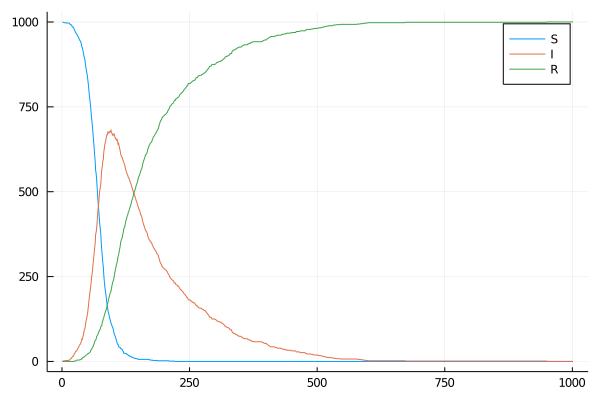

In [73]:
plot(Ss, fmt=:png, label="S")
plot!(Is, fmt=:png, label="I")
plot!(Rs, fmt=:png, label="R")

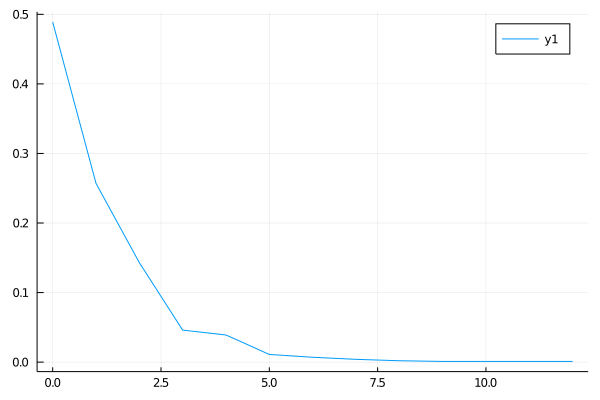

In [74]:
Ns, Ps = prod_dist

plot(Ns, Ps, fmt=:png)

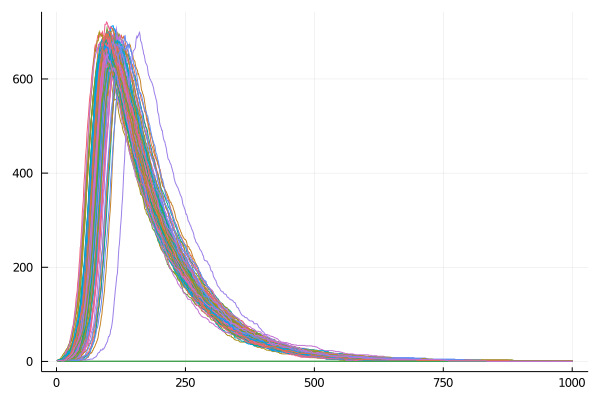

In [82]:
# Run the simulation num_simulations times - How to average and plot?
num_simulations = 100
N=1000
p_I = 0.1
p_R = 0.01
T=1000

p = plot(leg=false, fmt=:png)

results=[]
for i in 1:num_simulations
    Ss, Is, Rs, prob_dist = simulation_with_recovery(N, p_I, p_R, T)
    Ns, Ps = prob_dist
    plot!(Is)
    push!(results, prod_dist)
end

p